In [54]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import cluster
from sklearn import metrics
from sklearn import mixture

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data/snsdata.csv')
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [10]:
df.shape

(30000, 36)

In [12]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)
X[0][0]

-0.3322172643985876

In [14]:
kmeans = cluster.KMeans(n_clusters=9, random_state=42)
y_pred = kmeans.fit_predict(X)
kmeans.inertia_

857169.1033997748

In [18]:
cnt = Counter(y_pred)
dict(cnt)

{0: 19659, 3: 4490, 1: 930, 4: 851, 7: 2098, 6: 762, 5: 493, 8: 716, 2: 1}

In [19]:
df['label'] = kmeans.labels_
df['label'].value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: label, dtype: int64

[994116.3386407972, 965032.1004210366, 939457.1761824483, 913395.657292953, 892309.5548621645, 872318.1671214474, 857169.1033997748]


/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

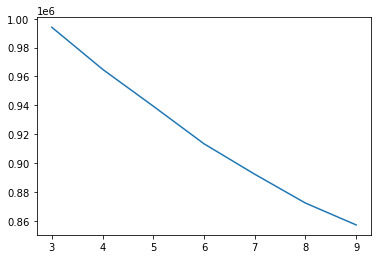

In [27]:
def get_inertia(X, n_cl):
    kmeans = cluster.KMeans(n_clusters=n_cl, random_state=42)
    kmeans.fit(X)
    return kmeans.inertia_

inert = []
for i in range(3, 10):
    inert.append(get_inertia(X, i))
print(inert)    
sns.lineplot([i for i in range(3, 10)], inert)

[0.3252983167661199, 0.32524147109392326, 0.3104227626278873, 0.3042253962461188, 0.29152119238612373, 0.25213836279655444, 0.24985471990292196]


/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

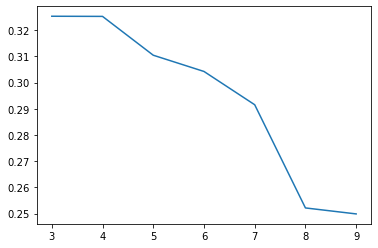

In [31]:
def get_silhuete(X, n_cl):
    kmeans = cluster.KMeans(n_clusters=n_cl, random_state=42)
    kmeans.fit(X)
    return metrics.silhouette_score(X, kmeans.labels_)

inert = []
for i in range(3, 10):
    inert.append(get_silhuete(X, i))
print(inert)    
sns.lineplot([i for i in range(3, 10)], inert)

In [41]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)
kmeans.inertia_
df['label'] = kmeans.labels_

In [53]:
for label, group in df.groupby('label'):
    means = group.iloc[:,:-1].sum().sort_values(ascending=False)
    print(means.head(10))

music         6267
dance         5929
shopping      5577
god           5263
cute          4741
hair          4376
church        3981
basketball    3930
mall          3913
football      3507
dtype: int64
hair      3643
sex       2746
music     2557
kissed    1780
die       1369
rock      1260
god       1128
band      1100
drugs     1080
dance     1075
dtype: int64
music       13311
god          7568
dance        5751
band         5580
hair         4658
shopping     4370
cute         4139
rock         3772
soccer       3490
football     3471
dtype: int64


In [55]:
gm = mixture.GaussianMixture(n_components=3, random_state=42)
y_pred = gm.fit_predict(X)
df['label'] = y_pred

In [56]:
df['label'].value_counts()

0    23426
1     6573
2        1
Name: label, dtype: int64

In [58]:
df[df['label']==2].sum()

basketball        0
football          2
soccer            0
softball          0
volleyball        0
swimming          1
cheerleading      0
baseball          0
tennis            0
sports            0
cute              1
sex              22
sexy              1
hot               0
kissed            0
dance             1
band              1
marching          0
music             0
rock              1
god              10
church            0
jesus             1
bible             0
hair             12
dress             2
blonde          327
mall              0
shopping          0
clothes           1
hollister         0
abercrombie       0
die               6
death             6
drunk             6
drugs             0
label             2
dtype: int64